In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta

/Users/user/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
#importando bases, depois de muito trabalho p localizar no MAC. lembrar de caminho da pasta, olhar no arquivo "obter info"
# removi TRPL4 (CTEEP), OMGE3, NEOE3, TIET11 da carteira - não consegui ajustar
portfolio= pd.read_excel('/Users/user/Desktop/Empresa/Empresas_IEE.xlsx')
df= pd.DataFrame(portfolio) 
portfolio= portfolio.dropna()
portfolio= portfolio.reset_index()
portfolio

,index,ticker,acao,companhia,tipo,qtd,part
0,0,ALUP11.SA,ALUP11,ALUPAR,UNT N2,6200,4.887
1,1,CESP6.SA,CESP6,CESP,PNB N1,5300,5.090
2,2,CMIG4.SA,CMIG4,CEMIG,PN N1,15500,5.965
3,3,COCE5.SA,COCE5,COELCE,PNA,3100,5.764
4,4,CPFE3.SA,CPFE3,CPFL ENERGIA,ON NM,4800,4.736
5,5,CPLE6.SA,CPLE6,COPEL,PNB N1,2600,5.130
6,6,EGIE3.SA,EGIE3,ENGIE BRASIL,ON NM,3600,5.224
7,7,ELET3.SA,ELET3,ELETROBRAS,ON N1,6100,7.063
8,8,ENBR3.SA,ENBR3,ENERGIAS BR,ON NM,8700,5.055
9,9,ENEV3.SA,ENEV3,ENEVA,ON NM,4000,6.305


In [4]:
# historico
index = pd.date_range(start = '2010-1-1', end = '2020-7-1')
prices = pd.DataFrame(index=index)
for t in df['ticker']:
    prices[t] = wb.DataReader(t, data_source = 'yahoo', start = '2010-01-01', end = '2015-01-01')['Adj Close']


In [5]:
# retornos
prices = prices.dropna(how = 'all')
daily_returns = prices.pct_change()
year_returns = prices.resample('A').ffill().pct_change()
acum_return = (daily_returns+1).cumprod()


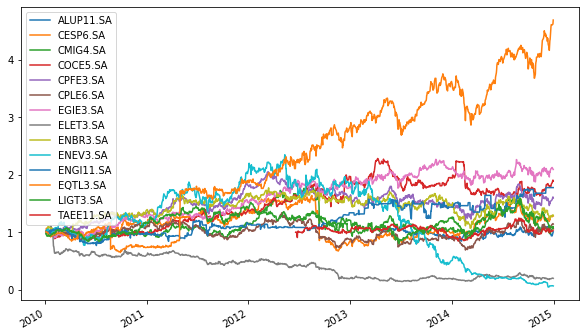

In [179]:
acum_return.plot(figsize=(10,6))

In [180]:
#Otimização - up to 2015

#definicoes
assets = df ['ticker']
mean_returns = daily_returns.mean()
cov_returns = daily_returns.cov()

#simulacoes - np.zeros?
num_portfolios = 1000
results = np.zeros((4+len(assets)-1,num_portfolios))

for i in range(num_portfolios):
    #random weights
    weights = np.array(np.random.random(len(assets)))
    #sum to 1
    weights /= np.sum(weights)
    
    #return and vol
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov_returns, weights))) * np.sqrt(252)
    
    #store results in array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std
    
    #Sharpe
    results[2,i] = results[0,i] / results[1,i]
    
    #store weights
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
        
#formatar
results_df = pd.DataFrame(results.T)
results_df = results_df.rename(columns={0:'return',1:'vol',2:'sharpe'})
for n in range(len(assets)):
    results_df = results_df.rename(columns={(n+3):assets[n]})


#maior Sharpe
max_sharpe = results_df.iloc[results_df['sharpe'].idxmax()]

#menor vol
min_vol = results_df.iloc[results_df['vol'].idxmin()]

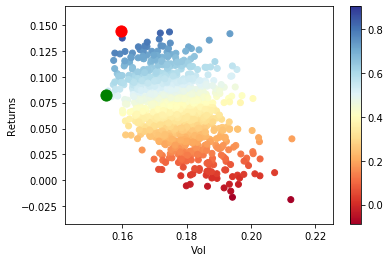

In [181]:
#grafico legal
plt.scatter(results_df['vol'],results_df['return'],c=results_df['sharpe'],cmap='RdYlBu')
plt.xlabel('Vol')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe[1],max_sharpe[0],marker='.',color='r',s=500)
plt.scatter(min_vol[1],min_vol[0],marker='.',color='g',s=500)

# historico - depois de jan15
index = pd.date_range(start = '2015-2-1', end = '2020-7-1')
prices = pd.DataFrame(index=index)
for t in df['ticker']:
    prices[t] = wb.DataReader(t, data_source = 'yahoo', start = '2010-01-01')['Adj Close']

start_date = dt.date(2015, 2, 1)
end_date = dt.date(2020, 7, 1)
#delta = dt.timedelta(months=1)

while start_date <= end_date:
    print(start_date)
    start_date += relativedelta(months=+1)
    
#x= date(2010,12,31)+relativedelta(months=+1)
#x

#testando intervalo de datas
start_date = dt.date(2020, 2, 10)
end_date = dt.date(2020, 3, 5)
index = pd.date_range(start = '2020-2-1', end = '2020-3-20')
pricesx = pd.DataFrame(index=index)
for t in df['ticker']:
        pricesx[t]= wb.DataReader (t,data_source = 'yahoo', start = str(start_date), end = str(end_date))['Adj Close']
        
pricesx

In [216]:
#definicoes 2
start_date = dt.date(2020, 2, 1)
end_date = dt.date(2020, 7, 1)
pf_start_date = dt.date (2020, 2, 1) #travar data inicial para otimizacao, quando rodar, jogo esse valor em 2015
#pf_end_date = pf_start_date + relativedelta(months=+1)
#pf_end_date = start_date + relativedelta(months=+1)
pf_end_date = start_date
#pf_end_date = dt.date(2020, 3, 1)
index = pd.date_range(start = '2019-12-1', end = '2020-7-1')
pricesx = pd.DataFrame(index=index)
#try except

In [217]:
while start_date <  end_date:
    
    for t in df['ticker']:
        #pf_end_date += relativedelta(months=+1)
        pricesx[t]= wb.DataReader (t,data_source = 'yahoo', start = str(pf_start_date), end = str(pf_end_date))['Adj Close']
        
        pricesx = pricesx.dropna(how = 'all')
        daily_returns = pricesx.pct_change()
        year_returns = pricesx.resample('A').ffill().pct_change()
        acum_return = (daily_returns+1).cumprod()
        
    start_date += relativedelta(months=+1)
    pf_end_date = start_date
    #pf_end_date += relativedelta(months=+1)
pricesx

KeyError: 'Date'

while start_date <  end_date:
    for t in df['ticker']:
        pf_end_date += relativedelta(months=+1)
        pricesx[t]= wb.DataReader (t,data_source = 'yahoo', start = str(pf_start_date), end = str(pf_end_date))['Adj Close']
        
        pricesx = pricesx.dropna(how = 'all')
        daily_returns = pricesx.pct_change()
        year_returns = pricesx.resample('A').ffill().pct_change()
        acum_return = (daily_returns+1).cumprod()
        
    start_date += relativedelta(months=+1)   
pricesx

while start_date <  end_date:
    for t in df['ticker']:
        #pf_end_date += relativedelta(months=+1)
        pricesx[t]= wb.DataReader (t,data_source = 'yahoo', start = str(pf_start_date), end = str(pf_end_date))['Adj Close']
        #pf_start_date = int(pf_start_date)
        
        pricesx = pricesx.dropna(how = 'all')
        daily_returns = pricesx.pct_change()
        year_returns = pricesx.resample('A').ffill().pct_change()
        acum_return = (daily_returns+1).cumprod()
        
    pf_start_date = int(pf_start_date) + relativedelta (months =+1)    
    start_date += relativedelta(months=+1)   
pricesx

In [20]:
#Otimização - mes a mes 2015-02-01 forward
start_date = dt.date(2015, 2, 1)
end_date = dt.date(2020, 7, 1)

while start_date <= end_date:
    for t in df['ticker']:
        prices[t]= wb.DataReader (t,data_source = 'yahoo', start = start_date, end = start_date += relativedelta(months=+1))['Adj Close'] )
    
    
    start_date += relativedelta(months=+1)
    





for t in df ['ticker']:
    prices[t] = wb.DataReader(t, data_source = 'yahoo', start = mes0, end = prox)

# historico - depois de jan15
index = pd.date_range(start = '2015-2-1', end = '2020-7-1')
prices = pd.DataFrame(index=index)
for t in df['ticker']:
    prices[t] = wb.DataReader(t, data_source = 'yahoo', start = '2010-01-01')['Adj Close']



#definicoes
assets = df ['ticker']
mean_returns = daily_returns.mean()
cov_returns = daily_returns.cov()

#simulacoes - np.zeros?
num_portfolios = 1000
results = np.zeros((4+len(assets)-1,num_portfolios))

for i in range(num_portfolios):
    #random weights
    weights = np.array(np.random.random(len(assets)))
    #sum to 1
    weights /= np.sum(weights)
    
    #return and vol
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov_returns, weights))) * np.sqrt(252)
    
    #store results in array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std
    
    #Sharpe
    results[2,i] = results[0,i] / results[1,i]
    
    #store weights
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
        
#formatar
results_df = pd.DataFrame(results.T)
results_df = results_df.rename(columns={0:'return',1:'vol',2:'sharpe'})
for n in range(len(assets)):
    results_df = results_df.rename(columns={(n+3):assets[n]})


#maior Sharpe
max_sharpe = results_df.iloc[results_df['sharpe'].idxmax()]

#menor vol
min_vol = results_df.iloc[results_df['vol'].idxmin()]

datetime.date(2011, 1, 31)

In [32]:
assets = ['FIND.SA']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start= '2010-1-1')['Adj Close']
    
pf_data

,FIND.SA
Date,
2011-04-07,36.799999
2011-04-08,36.150002
2011-04-11,35.900002
2011-04-12,35.570000
2011-04-13,35.400002
...,...
2018-08-23,44.730000
2018-09-03,44.730000
2018-09-05,44.730000


In [27]:
pf_data.tail()

,ECOO.SA
Date,
2018-09-06,53.889999
2018-09-10,53.889999
2018-09-11,53.889999
2018-09-13,53.889999
2020-07-14,105.059998
